In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/Users/rupaliwadhawan/Downloads/Hotel Reservations.csv')

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df['no_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [8]:
numerical_columns = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests','arrival_date','arrival_month']

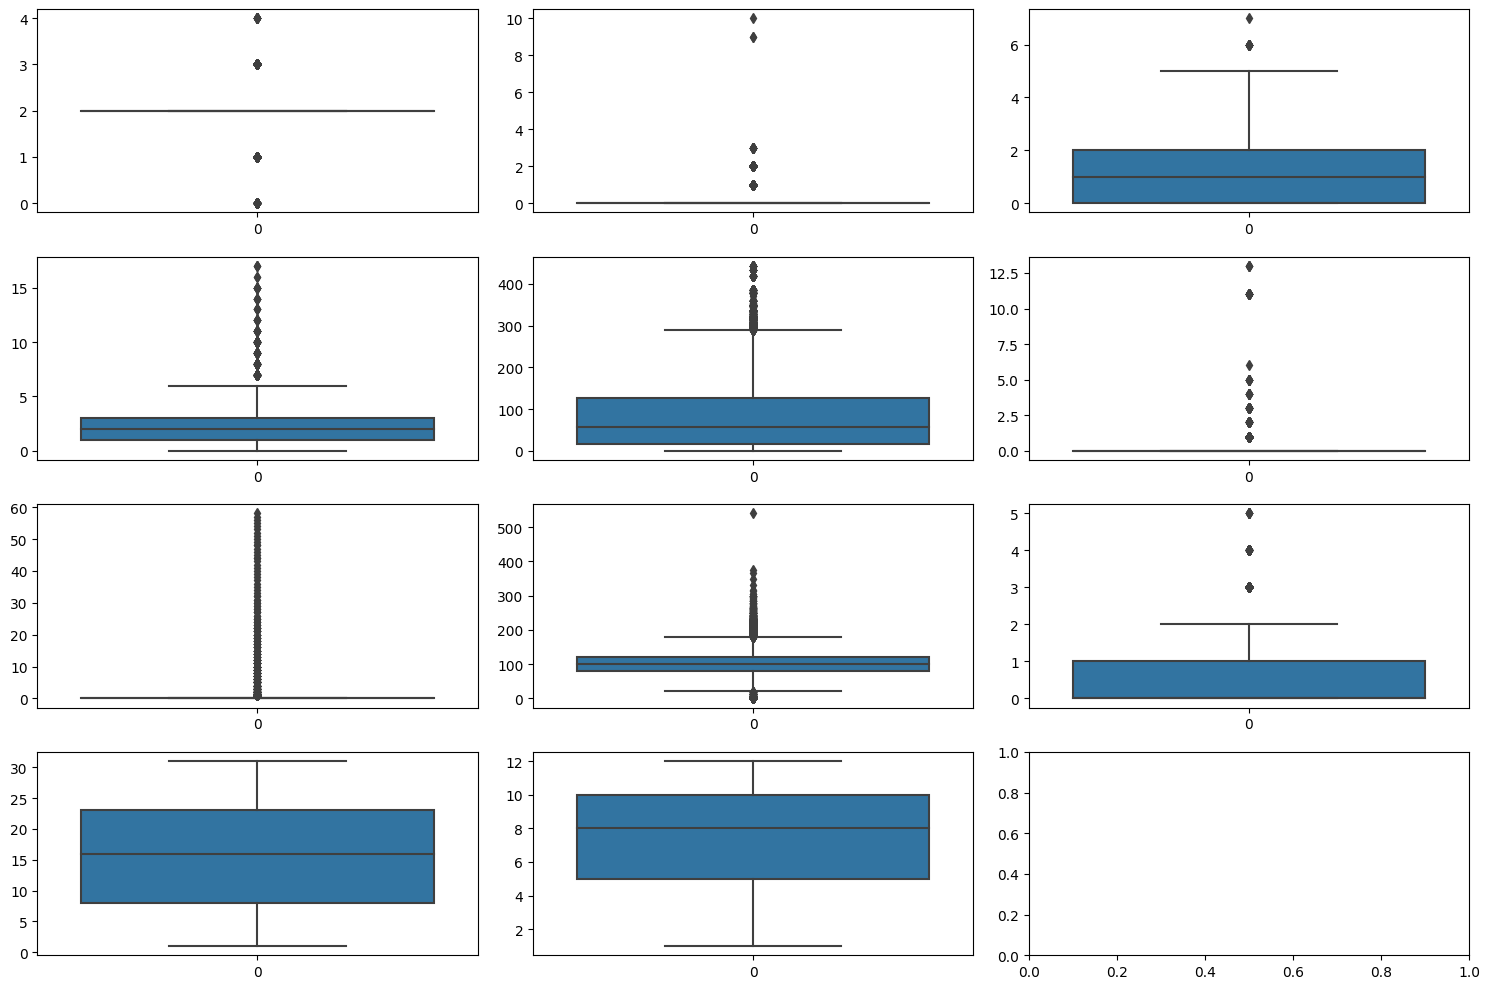

In [9]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
plt1 = sns.boxplot(df['no_of_adults'], ax = axs[0,0])
plt2 = sns.boxplot(df['no_of_children'], ax = axs[0,1])
plt3 = sns.boxplot(df['no_of_weekend_nights'], ax = axs[0,2])
plt1 = sns.boxplot(df['no_of_week_nights'], ax = axs[1,0])
plt2 = sns.boxplot(df['lead_time'], ax = axs[1,1])
plt3 = sns.boxplot(df['no_of_previous_cancellations'], ax = axs[1,2])
plt1 = sns.boxplot(df['no_of_previous_bookings_not_canceled'],ax=axs[2,0])
plt2 = sns.boxplot(df['avg_price_per_room'],ax=axs[2,1])
plt3 = sns.boxplot(df['no_of_special_requests'],ax=axs[2,2])
plt1 = sns.boxplot(df['arrival_date'],ax=axs[3,0])
plt2 = sns.boxplot(df['arrival_month'],ax=axs[3,1])
plt.tight_layout()

In [10]:
df = df[df['no_of_children'] < 8]

In [11]:
df = df[df['no_of_previous_cancellations'] < 9]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36243 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36243 non-null  object 
 1   no_of_adults                          36243 non-null  int64  
 2   no_of_children                        36243 non-null  int64  
 3   no_of_weekend_nights                  36243 non-null  int64  
 4   no_of_week_nights                     36243 non-null  int64  
 5   type_of_meal_plan                     36243 non-null  object 
 6   required_car_parking_space            36243 non-null  int64  
 7   room_type_reserved                    36243 non-null  object 
 8   lead_time                             36243 non-null  int64  
 9   arrival_year                          36243 non-null  int64  
 10  arrival_month                         36243 non-null  int64  
 11  arrival_date        

In [13]:
Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['avg_price_per_room'] >= Q1 - 1.5*IQR) & (df['avg_price_per_room'] <= Q3 + 1.5*IQR)]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34547 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            34547 non-null  object 
 1   no_of_adults                          34547 non-null  int64  
 2   no_of_children                        34547 non-null  int64  
 3   no_of_weekend_nights                  34547 non-null  int64  
 4   no_of_week_nights                     34547 non-null  int64  
 5   type_of_meal_plan                     34547 non-null  object 
 6   required_car_parking_space            34547 non-null  int64  
 7   room_type_reserved                    34547 non-null  object 
 8   lead_time                             34547 non-null  int64  
 9   arrival_year                          34547 non-null  int64  
 10  arrival_month                         34547 non-null  int64  
 11  arrival_date        

In [15]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    23091
Canceled        11456
Name: count, dtype: int64

In [16]:
numerical_columns

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'arrival_date',
 'arrival_month']

<Axes: xlabel='arrival_month', ylabel='Count'>

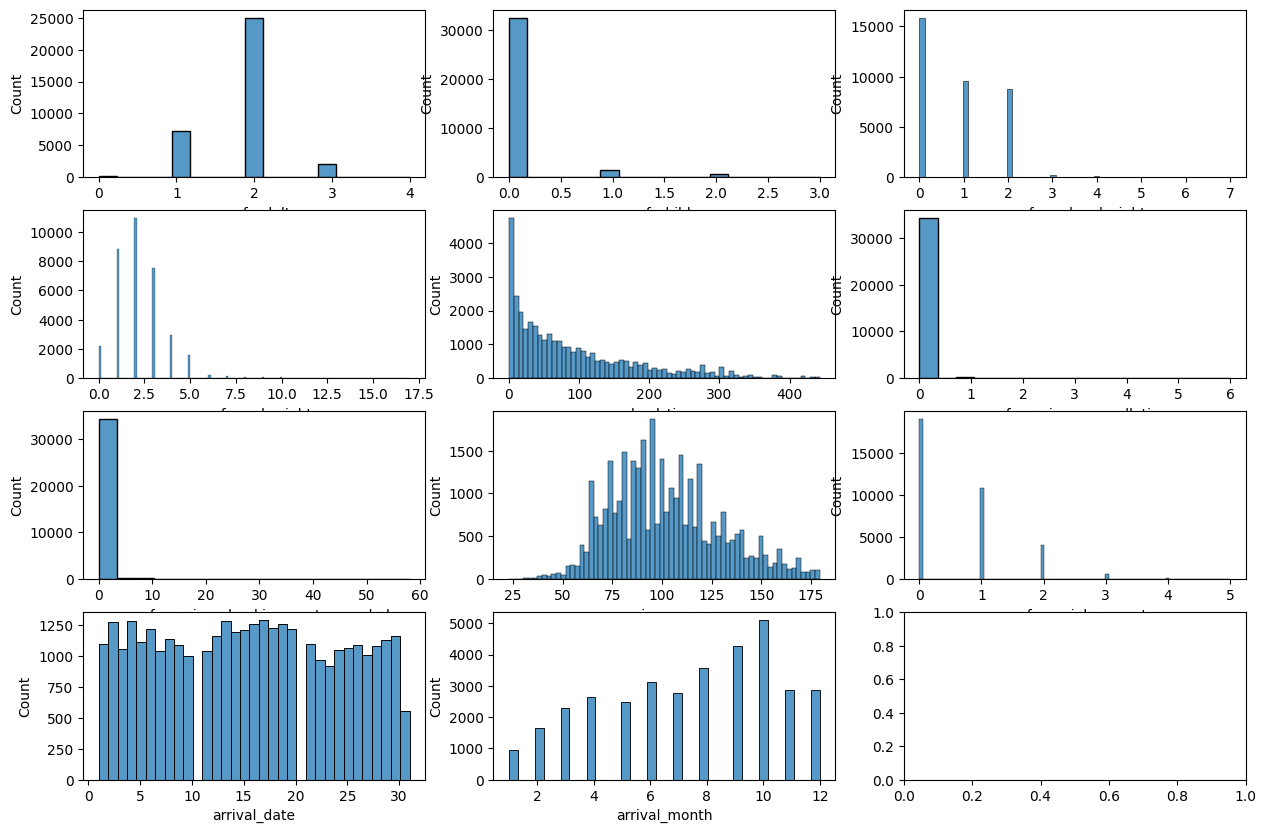

In [17]:
fig, axs = plt.subplots(4,3, figsize=(15,10))

sns.histplot(df['no_of_adults'], ax=axs[0][0])
sns.histplot(df['no_of_children'], ax=axs[0][1])
sns.histplot(df['no_of_weekend_nights'], ax=axs[0][2])
sns.histplot(df['no_of_week_nights'], ax=axs[1][0])
sns.histplot(df['lead_time'], ax=axs[1][1])
sns.histplot(df['no_of_previous_cancellations'], ax=axs[1][2])
sns.histplot(df['no_of_previous_bookings_not_canceled'], ax=axs[2][0])
sns.histplot(df['avg_price_per_room'], ax=axs[2][1])
sns.histplot(df['no_of_special_requests'], ax=axs[2][2])
sns.histplot(df['arrival_date'], ax=axs[3][0])
sns.histplot(df['arrival_month'], ax=axs[3][1])


<Axes: xlabel='arrival_month', ylabel='booking_status'>

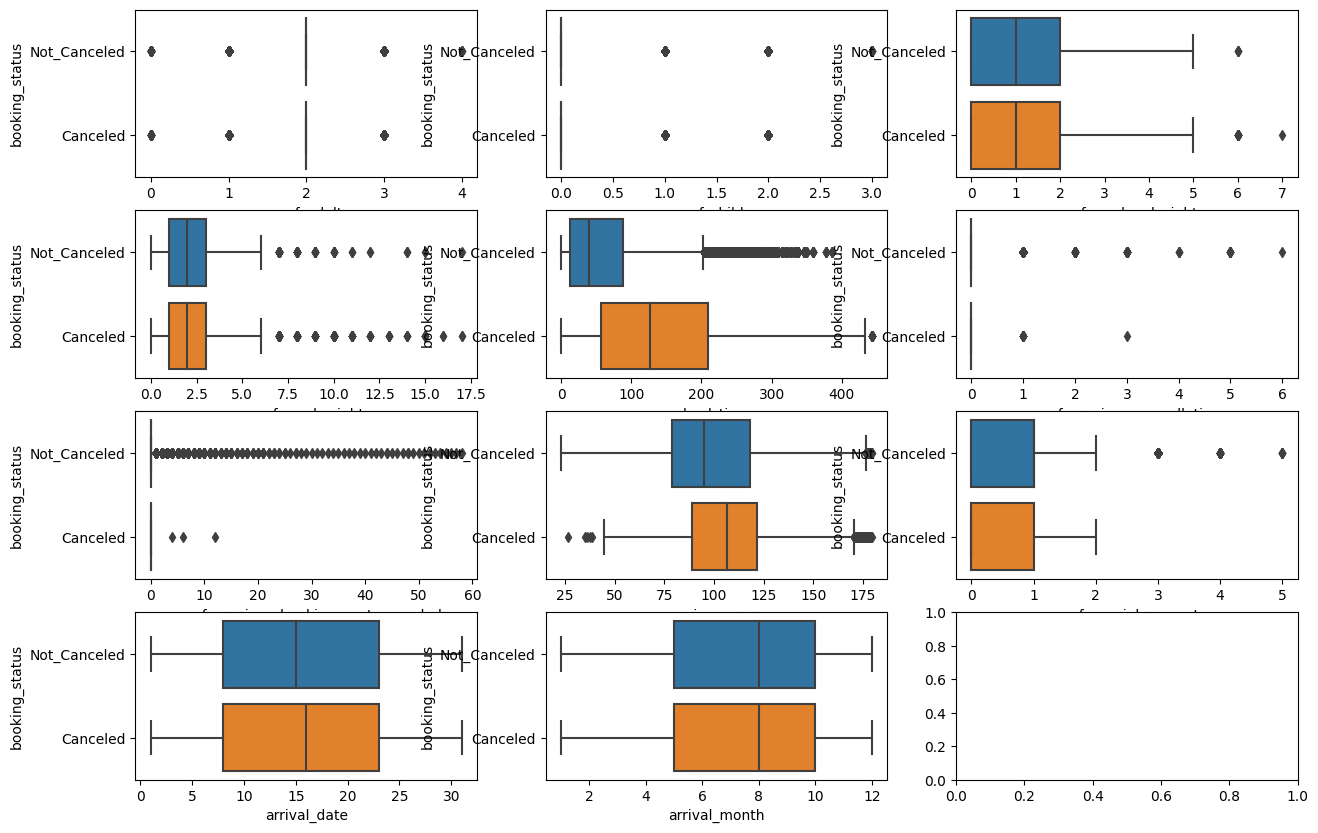

In [18]:
fig, axs = plt.subplots(4,3, figsize=(15,10))

sns.boxplot(x='no_of_adults',y='booking_status', data=df, ax=axs[0][0])
sns.boxplot(x='no_of_children',y='booking_status', data=df, ax=axs[0][1])
sns.boxplot(x='no_of_weekend_nights',y='booking_status', data=df, ax=axs[0][2])
sns.boxplot(x='no_of_week_nights',y='booking_status', data=df, ax=axs[1][0])
sns.boxplot(x='lead_time',y='booking_status', data=df, ax=axs[1][1])
sns.boxplot(x='no_of_previous_cancellations',y='booking_status', data=df, ax=axs[1][2])
sns.boxplot(x='no_of_previous_bookings_not_canceled',y='booking_status', data=df, ax=axs[2][0])
sns.boxplot(x='avg_price_per_room',y='booking_status', data=df, ax=axs[2][1])
sns.boxplot(x='no_of_special_requests',y='booking_status', data=df, ax=axs[2][2])
sns.boxplot(x='arrival_date',y='booking_status', data=df, ax=axs[3][0])
sns.boxplot(x='arrival_month',y='booking_status', data=df, ax=axs[3][1])

Initial Hypothesis: lead time, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room are strong predictors


In [19]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [20]:
df['arrival_year'].unique()

array([2017, 2018])

In [21]:
categorical_columns = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type','repeated_guest','arrival_year','booking_status']

In [22]:
df.groupby(['type_of_meal_plan','booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
type_of_meal_plan,,
Meal Plan 1,8373,18069
Meal Plan 2,1386,1641
Not Selected,1697,3381


In [23]:
df.groupby(['required_car_parking_space','booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
required_car_parking_space,,
0,11352,22189
1,104,902


In [24]:
df.groupby(['room_type_reserved','booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
room_type_reserved,,
Room_Type 1,9002,18489
Room_Type 2,217,422
Room_Type 3,2,3
Room_Type 4,1994,3744
Room_Type 5,57,159
Room_Type 6,180,258
Room_Type 7,4,16


In [25]:
df.groupby(['market_segment_type','booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
market_segment_type,,
Aviation,37.0,88.0
Complementary,NaN,16.0
Corporate,219.0,1787.0
Offline,3105.0,7326.0
Online,8095.0,13874.0


In [26]:
df.groupby(['repeated_guest','booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
repeated_guest,,
0,11444,22335
1,12,756


In [27]:
df.groupby(['arrival_year','booking_status'])['Booking_ID'].count().unstack()

booking_status,Canceled,Not_Canceled
arrival_year,,
2017,921,5223
2018,10535,17868


In [28]:
df[df['booking_status']=='Canceled'].describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,11456,11456.000000,11456.000000,11456.000000,11456.000000,11456,11456.000000,11456,11456.000000,11456.000000,11456.000000,11456.000000,11456,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456
unique,11456,NaN,NaN,NaN,NaN,3,NaN,7,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1
top,INN00003,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Canceled
freq,1,NaN,NaN,NaN,NaN,8373,NaN,9002,NaN,NaN,NaN,NaN,8095,NaN,NaN,NaN,NaN,NaN,11456
mean,NaN,1.902060,0.085108,0.885824,2.386697,NaN,0.009078,NaN,141.610161,2017.919605,7.374825,15.684270,NaN,0.001047,0.001222,0.001920,107.115863,0.335894,NaN
std,NaN,0.483523,0.343045,0.916346,1.580405,NaN,0.094850,NaN,99.077245,0.271915,2.668904,8.812331,NaN,0.032349,0.041767,0.130793,25.470486,0.574861,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,26.350000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,57.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,89.100000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,126.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,106.300000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,209.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,121.600000,1.000000,NaN


In [29]:
df[df['booking_status']=='Not_Canceled'].describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,23091,23091.000000,23091.000000,23091.000000,23091.000000,23091,23091.000000,23091,23091.000000,23091.000000,23091.000000,23091.000000,23091,23091.000000,23091.000000,23091.000000,23091.000000,23091.000000,23091
unique,23091,NaN,NaN,NaN,NaN,3,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,1
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,18069,NaN,18489,NaN,NaN,NaN,NaN,13874,NaN,NaN,NaN,NaN,NaN,23091
mean,NaN,1.814776,0.070937,0.785977,2.141181,NaN,0.039063,NaN,60.683470,2017.773808,7.429258,15.511758,NaN,0.032740,0.018276,0.188342,99.630679,0.742454,NaN
std,NaN,0.521217,0.308098,0.846164,1.311239,NaN,0.193749,NaN,64.479277,0.418374,3.260225,8.719699,NaN,0.177959,0.206676,2.001817,27.917869,0.826567,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,23.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,12.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,79.000000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,40.000000,2018.000000,8.000000,15.000000,NaN,0.000000,0.000000,0.000000,95.000000,1.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,88.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,117.900000,1.000000,NaN


In [30]:
categorical_columns

['type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'market_segment_type',
 'repeated_guest',
 'arrival_year',
 'booking_status']

In [31]:
df[categorical_columns]

,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,arrival_year,booking_status
0,Meal Plan 1,0,Room_Type 1,Offline,0,2017,Not_Canceled
1,Not Selected,0,Room_Type 1,Online,0,2018,Not_Canceled
2,Meal Plan 1,0,Room_Type 1,Online,0,2018,Canceled
3,Meal Plan 1,0,Room_Type 1,Online,0,2018,Canceled
4,Not Selected,0,Room_Type 1,Online,0,2018,Canceled
...,...,...,...,...,...,...,...
36270,Meal Plan 1,0,Room_Type 4,Online,0,2018,Not_Canceled
36271,Meal Plan 1,0,Room_Type 1,Online,0,2018,Canceled
36272,Meal Plan 1,0,Room_Type 1,Online,0,2018,Not_Canceled
36273,Not Selected,0,Room_Type 1,Online,0,2018,Canceled


In [32]:
meal_plan = pd.get_dummies(df['type_of_meal_plan'], dtype=int)
car_park_reqd = pd.get_dummies(df['required_car_parking_space'], dtype=int)
car_park_reqd.rename(columns={0:'Parking_not_required',1:'Parking_required'},inplace=True)
room_type = pd.get_dummies(df['room_type_reserved'], dtype=int)
mkt_segment = pd.get_dummies(df['market_segment_type'], dtype=int)
repeated_guest = pd.get_dummies(df['repeated_guest'], dtype=int)
repeated_guest.rename(columns={0:'Not_repeated',1:'Repeated'},inplace=True)
arrival_year = pd.get_dummies(df['arrival_year'], dtype=int)
arrival_year.rename(columns={2017:'year_17',2018:'year_18'},inplace=True)

In [33]:
new_df = pd.concat([df[['lead_time','no_of_previous_cancellations','avg_price_per_room','no_of_previous_bookings_not_canceled']],meal_plan,car_park_reqd,room_type,mkt_segment,repeated_guest,arrival_year,df['booking_status']],axis=1)

In [34]:
new_df

,lead_time,no_of_previous_cancellations,avg_price_per_room,no_of_previous_bookings_not_canceled,Meal Plan 1,Meal Plan 2,Not Selected,Parking_not_required,Parking_required,Room_Type 1,...,Aviation,Complementary,Corporate,Offline,Online,Not_repeated,Repeated,year_17,year_18,booking_status
0,224,0,65.00,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,Not_Canceled
1,5,0,106.68,0,0,0,1,1,0,1,...,0,0,0,0,1,1,0,0,1,Not_Canceled
2,1,0,60.00,0,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,Canceled
3,211,0,100.00,0,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,Canceled
4,48,0,94.50,0,0,0,1,1,0,1,...,0,0,0,0,1,1,0,0,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,85,0,167.80,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,Not_Canceled
36271,228,0,90.95,0,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,Canceled
36272,148,0,98.39,0,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,Not_Canceled
36273,63,0,94.50,0,0,0,1,1,0,1,...,0,0,0,0,1,1,0,0,1,Canceled


In [35]:
def booking_status(x):
    if x=='Not_Canceled':
        return 1
    elif x=='Canceled':
        return 0

In [36]:
new_df['booking_status'] = new_df['booking_status'].apply(booking_status)

In [37]:
new_df.dropna(inplace=True)

In [38]:
new_df.columns

Index(['lead_time', 'no_of_previous_cancellations', 'avg_price_per_room',
       'no_of_previous_bookings_not_canceled', 'Meal Plan 1', 'Meal Plan 2',
       'Not Selected', 'Parking_not_required', 'Parking_required',
       'Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
       'Room_Type 5', 'Room_Type 6', 'Room_Type 7', 'Aviation',
       'Complementary', 'Corporate', 'Offline', 'Online', 'Not_repeated',
       'Repeated', 'year_17', 'year_18', 'booking_status'],
      dtype='object')

In [39]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(new_df.iloc[:,:25],new_df.iloc[:,25])
pred = knn.predict(new_df.iloc[:,:25])
print(accuracy_score(pred,new_df.iloc[:,25]))

0.7967117260543607


In [40]:
print(f1_score(pred,new_df.iloc[:,25]))
print(recall_score(pred,new_df.iloc[:,25]))
print(precision_score(pred,new_df.iloc[:,25]))

0.8597223609307899
0.7978423667235115
0.9320081417002295


In [41]:
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()


In [42]:
X_train, X_test, y_train, y_test = train_test_split(np.array(new_df.iloc[:,:25]), np.array(new_df.iloc[:,25]), test_size=0.2, random_state=123)

In [43]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [44]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [45]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

0.831315577078289
0.21219047619047618
0.8502323616392057
0.8408869869675161


In [46]:
pred_knn_prob = knn.predict_proba(X_test)

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, pred_knn_prob[:,1])

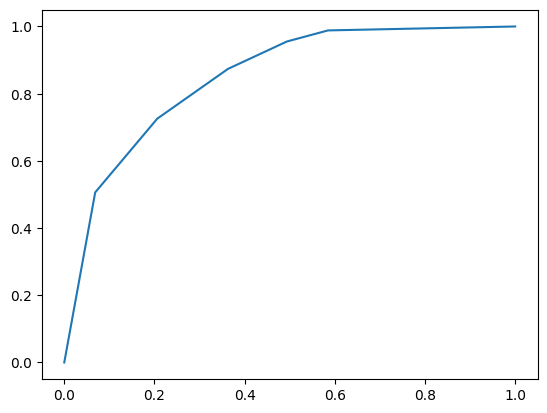

In [48]:
plt.plot(fpr,tpr)

In [49]:
gmeans = np.sqrt(tpr*(1-fpr))

In [50]:
thresholds[np.argmax(gmeans)]

0.8

In [51]:
params_knn = {'n_neighbors': list(range(3,300)), 'weights': ['uniform', 'distance'], 'metric':['euclidean','manhattan']}
rs_knn = RandomizedSearchCV(knn, params_knn, n_iter=10, cv=10, scoring='f1')
rs_knn.fit(X_train, y_train)
rs_knn.best_params_

{'weights': 'distance', 'n_neighbors': 168, 'metric': 'euclidean'}

In [52]:

rs_knn = RandomizedSearchCV(knn, params_knn, n_iter=10, cv=10, scoring='f1')
rs_knn.fit(X_train, y_train)

rs_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=246, weights='distance')

In [55]:

knn_best = KNeighborsClassifier(n_neighbors=246,metric='manhattan',weights='distance')

knn_best.fit(X_train, y_train)

pred_knn_best = knn_best.predict(X_test)

print(f1_score(pred_knn_best, y_test))

0.8795952085914912


In [56]:
cv_scores_knn = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='f1')
print("Cross-validation scores for KNN: ", cv_scores_knn)

Cross-validation scores for KNN:  [0.87253279 0.87848555 0.87781061 0.87525773 0.88028896]
